<a href="https://colab.research.google.com/github/Astraxx04/ML_Models/blob/main/Mnist_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import sklearn

import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)
tf.random.set_seed(42)

Get the Data

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

Split into train val test and normalize

In [ ]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255. 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

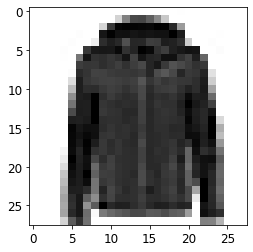

In [ ]:
plt.imshow(X_train[0], cmap="binary")

In [ ]:
y_train[0]

4

In [ ]:
class_names = [
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
     "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Create a Model

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


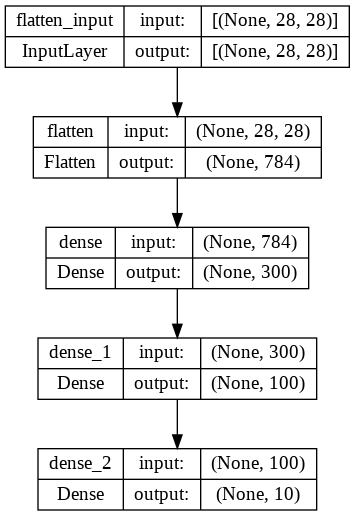

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [ ]:
weights, biases =hidden1.get_weights()

In [ ]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

Compile and train the model

In [ ]:
from tensorflow.python import metrics
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(),
    metrics=[keras.metrics.sparse_categorical_accuracy]
)

In [ ]:
history = model.fit(
    X_train, y_train, epochs =30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7237 - sparse_categorical_accuracy: 0.7643 - val_loss: 0.5213 - val_sparse_categorical_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4842 - sparse_categorical_accuracy: 0.8317 - val_loss: 0.4351 - val_sparse_categorical_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4392 - sparse_categorical_accuracy: 0.8454 - val_loss: 0.5360 - val_sparse_categorical_accuracy: 0.7978
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4124 - sparse_categorical_accuracy: 0.8566 - val_loss: 0.3917 - val_sparse_categorical_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3940 - sparse_categorical_accuracy: 0.8619 - val_loss: 0.3749 - val_sparse_categorical_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3751 - spa

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

(0.0, 1.0)

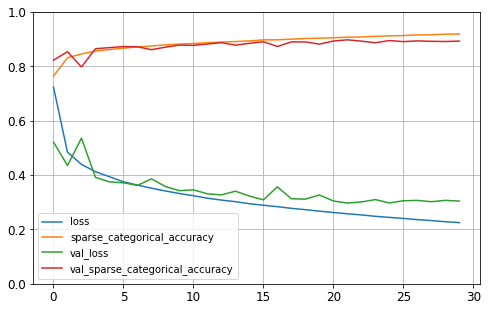

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

Evaluate and save the model

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3366 - sparse_categorical_accuracy: 0.8835


[0.33657705783843994, 0.8834999799728394]